In [1]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
imagegen = ImageDataGenerator()
train = imagegen.flow_from_directory("data\intel-image-classification\seg_train\seg_train")
val = imagegen.flow_from_directory("data\intel-image-classification\seg_test\seg_test")

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [3]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, InputLayer, BatchNormalization, Dropout


model = Sequential()

model.add(InputLayer(input_shape = (256,256,3)))

model.add(Conv2D(32, kernel_size = (5,5), activation = 'relu', strides = (1,1), padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(32, kernel_size = (5,5), activation = 'relu', strides = (1,1), padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu', strides = (1,1), padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu', strides = (1,1), padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(BatchNormalization())
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(BatchNormalization())
model.add(Dropout(0.20))
model.add(Dense(6, activation = "softmax"))
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 256, 256, 32)      2432      
_________________________________________________________________
batch_normalization_1 (Batch (None, 256, 256, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 32)      25632     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 64, 32)        0         
______________________________________

In [4]:
from keras.optimizers import RMSprop
from keras.callbacks import ReduceLROnPlateau

optimizer = RMSprop(lr = 0.001, rho = 0.9, epsilon = 1e-08, decay = 0.0)
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ["accuracy"])


In [5]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [6]:
epochs = 5
batch_size = 128

In [7]:
history = model.fit_generator(train, epochs=epochs, validation_data=val, verbose = 2, steps_per_epoch = 5,  callbacks=[learning_rate_reduction])



Epoch 1/5
 - 311s - loss: 2.4540 - accuracy: 0.3313 - val_loss: 29.3881 - val_accuracy: 0.1493
Epoch 2/5
 - 210s - loss: 2.0469 - accuracy: 0.4437 - val_loss: 11.8430 - val_accuracy: 0.2930
Epoch 3/5
 - 223s - loss: 1.4956 - accuracy: 0.4812 - val_loss: 15.6795 - val_accuracy: 0.2383
Epoch 4/5
 - 243s - loss: 1.3617 - accuracy: 0.5250 - val_loss: 5.5650 - val_accuracy: 0.2583
Epoch 5/5
 - 244s - loss: 1.5844 - accuracy: 0.4750 - val_loss: 5.9143 - val_accuracy: 0.3183


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import rcParams

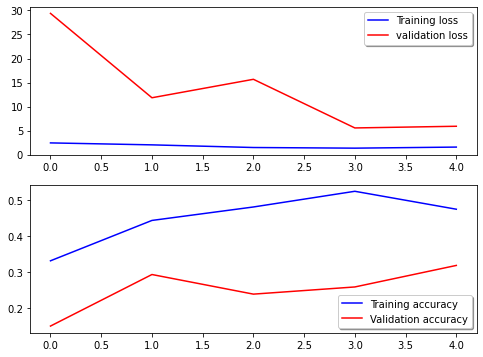

In [9]:
fig, ax = plt.subplots(2,1, figsize=(8, 6))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

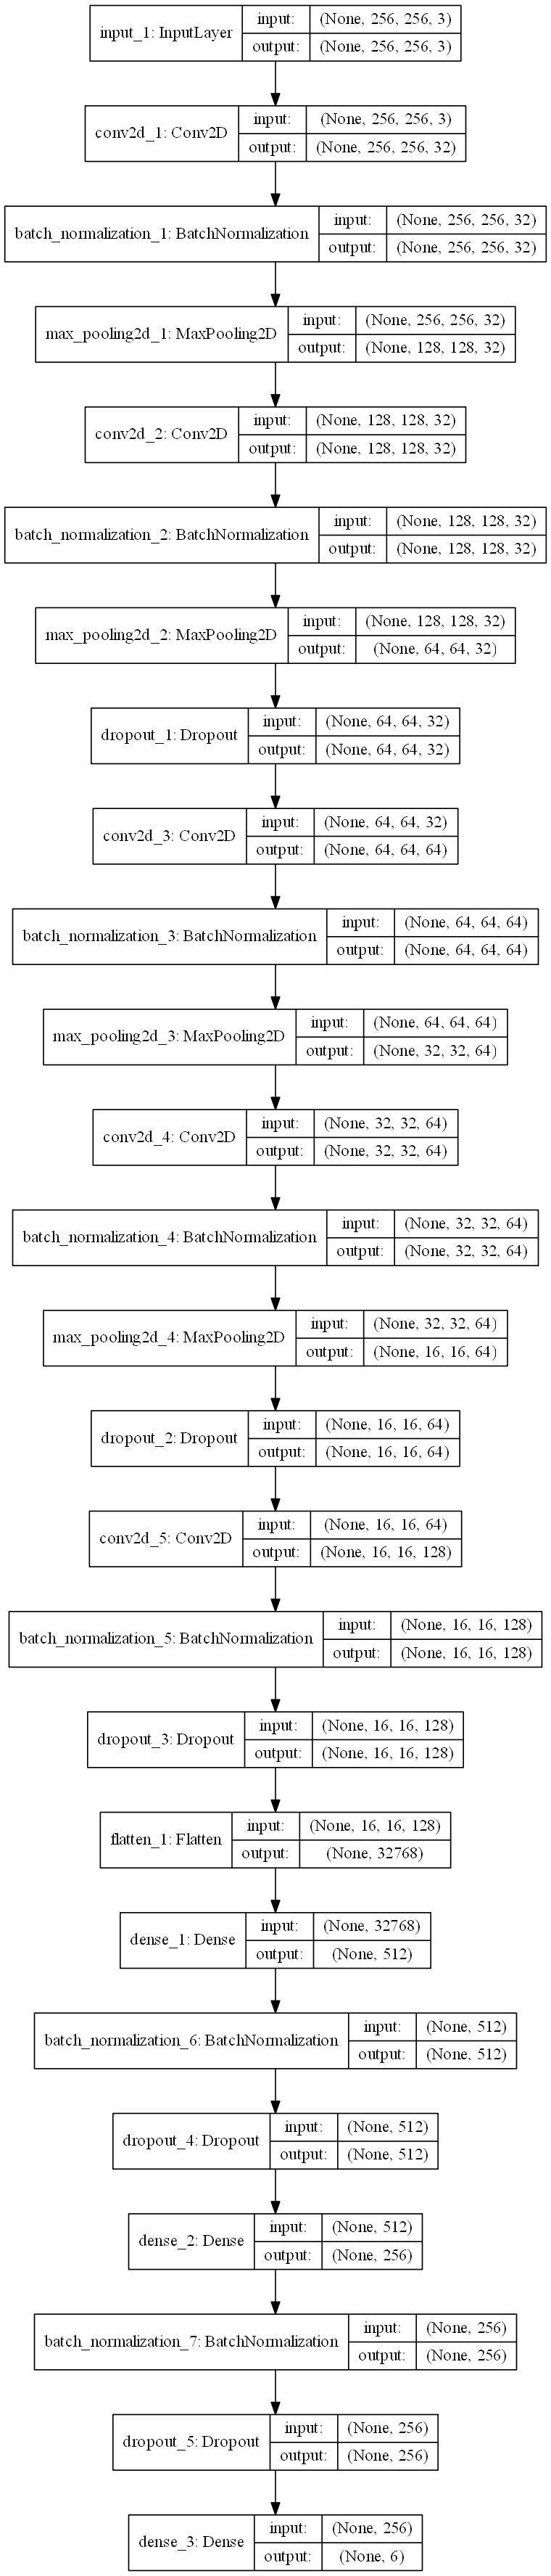

In [10]:
# from keras.utils.vis_utils import plot_model
# plot_model(model, to_file='temp/model.png', show_shapes=True, show_layer_names=True,dpi = 120)